## Neural Network Introduction #2

This exercise is adapted from https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

Now you have successfully used SciKit Learn's MLP to work on the built-in Breast Cancer Data Set, let's try another one!

Download the wine dataset from UCI Machine learning repository (http://archive.ics.uci.edu/ml/datasets/Wine/). Import the dataset into a pandas dataframe

In [1]:
import pandas as pd
dataframe = pd.read_csv('./Data/Wine.csv')

Check out the dataframe - what are the first few rows of data?

In [2]:
# find out the attributes in the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
# find out the total instances and number of features
dataframe.shape

(178, 14)

In [4]:
# use describe to find out more about the data
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


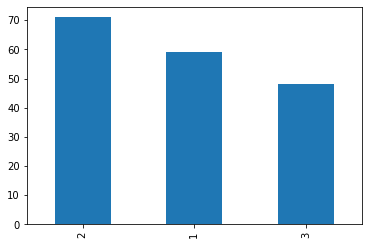

In [5]:
dataframe['Customer_Segment'].value_counts().plot(kind='bar')

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers




In [7]:
#val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
val_dataframe = dataframe.sample(frac=0.3, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 125 samples for training and 53 for validation


In [ ]:

# 1. multiclass target requires 1 hot encoding
# 2. multiclass requires a different activation function
# 3. you might not need the dropoff layer
# 4, you need a different loss function



In [41]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Customer_Segment")
    
    encoder = LabelEncoder()
    encoder.fit(labels)
    encoded_y = encoder.transform(labels)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_y)    
    
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), dummy_y))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [42]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Customer_Segment:", y)
    
#train_ds

Input: {'Alcohol': <tf.Tensor: shape=(), dtype=float64, numpy=13.72>, 'Malic_Acid': <tf.Tensor: shape=(), dtype=float64, numpy=1.43>, 'Ash': <tf.Tensor: shape=(), dtype=float64, numpy=2.5>, 'Ash_Alcanity': <tf.Tensor: shape=(), dtype=float64, numpy=16.7>, 'Magnesium': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'Total_Phenols': <tf.Tensor: shape=(), dtype=float64, numpy=3.4>, 'Flavanoids': <tf.Tensor: shape=(), dtype=float64, numpy=3.67>, 'Nonflavanoid_Phenols': <tf.Tensor: shape=(), dtype=float64, numpy=0.19>, 'Proanthocyanins': <tf.Tensor: shape=(), dtype=float64, numpy=2.04>, 'Color_Intensity': <tf.Tensor: shape=(), dtype=float64, numpy=6.8>, 'Hue': <tf.Tensor: shape=(), dtype=float64, numpy=0.89>, 'OD280': <tf.Tensor: shape=(), dtype=float64, numpy=2.87>, 'Proline': <tf.Tensor: shape=(), dtype=int64, numpy=1285>}
Customer_Segment: tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)


In [43]:
# # # Import the StandardScalar library
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
# # Fit only to the training data
#scaler.fit(train_ds)
# # Fit only to the training data

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [44]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Customer_Segment:", y)
    
    
    

Input: {'Alcohol': <tf.Tensor: shape=(), dtype=float64, numpy=14.16>, 'Malic_Acid': <tf.Tensor: shape=(), dtype=float64, numpy=2.51>, 'Ash': <tf.Tensor: shape=(), dtype=float64, numpy=2.48>, 'Ash_Alcanity': <tf.Tensor: shape=(), dtype=float64, numpy=20.0>, 'Magnesium': <tf.Tensor: shape=(), dtype=int64, numpy=91>, 'Total_Phenols': <tf.Tensor: shape=(), dtype=float64, numpy=1.68>, 'Flavanoids': <tf.Tensor: shape=(), dtype=float64, numpy=0.7>, 'Nonflavanoid_Phenols': <tf.Tensor: shape=(), dtype=float64, numpy=0.44>, 'Proanthocyanins': <tf.Tensor: shape=(), dtype=float64, numpy=1.24>, 'Color_Intensity': <tf.Tensor: shape=(), dtype=float64, numpy=9.7>, 'Hue': <tf.Tensor: shape=(), dtype=float64, numpy=0.62>, 'OD280': <tf.Tensor: shape=(), dtype=float64, numpy=1.71>, 'Proline': <tf.Tensor: shape=(), dtype=int64, numpy=660>}
Customer_Segment: tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)


In [45]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)
#train_ds = train_ds.batch(18)
#val_ds = val_ds.batch(18)



In [46]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [47]:
# Build a Model


In [48]:
# Categorical features encoded as integers
Magnesium = keras.Input(shape=(1,), name="Magnesium", dtype="int64")

Proline = keras.Input(shape=(1,), name="Proline", dtype="int64")

# Categorical feature encoded as string
#Proline = keras.Input(shape=(1,), name="Proline", dtype="string")

# Numerical features
Alcohol = keras.Input(shape=(1,), name="Alcohol")
Malic_Acid = keras.Input(shape=(1,), name="Malic_Acid")
Ash = keras.Input(shape=(1,), name="Ash")
Ash_Alcanity = keras.Input(shape=(1,), name="Ash_Alcanity")
Total_Phenols = keras.Input(shape=(1,), name="Total_Phenols")
Flavanoids = keras.Input(shape=(1,), name="Flavanoids")
Nonflavanoid_Phenols = keras.Input(shape=(1,), name="Nonflavanoid_Phenols")
Proanthocyanins = keras.Input(shape=(1,), name="Proanthocyanins")
Color_Intensity = keras.Input(shape=(1,), name="Color_Intensity")
Hue = keras.Input(shape=(1,), name="Hue")
OD280 = keras.Input(shape=(1,), name="OD280")

In [49]:
all_inputs = [
    Magnesium,
    Proline,
    Alcohol,
    Malic_Acid,
    Ash,
    Ash_Alcanity,
    Total_Phenols,
    Flavanoids,
    Nonflavanoid_Phenols,
    Proanthocyanins,
    Color_Intensity,
    Hue,
    OD280,
]

In [50]:

# Integer categorical features
Magnesium_encoded = encode_categorical_feature(Magnesium, "Magnesium", train_ds, False)

Proline_encoded = encode_categorical_feature(Proline, "Proline", train_ds, False)
# String categorical features
#Proline_encoded = encode_categorical_feature(Proline, "Proline", train_ds, True)

# Numerical features
Alcohol_encoded = encode_numerical_feature(Alcohol, "Alcohol", train_ds)
Malic_Acid_encoded = encode_numerical_feature(Malic_Acid, "Malic_Acid", train_ds)
Ash_encoded = encode_numerical_feature(Ash, "Ash", train_ds)
Ash_Alcanity_encoded = encode_numerical_feature(Ash_Alcanity, "Ash_Alcanity", train_ds)
Total_Phenols_encoded = encode_numerical_feature(Total_Phenols, "Total_Phenols", train_ds)
Flavanoids_encoded = encode_numerical_feature(Flavanoids, "Flavanoids", train_ds)
Nonflavanoid_Phenols_encoded = encode_numerical_feature(Nonflavanoid_Phenols, "Nonflavanoid_Phenols", train_ds)
Proanthocyanins_encoded = encode_numerical_feature(Proanthocyanins, "Proanthocyanins", train_ds)
Color_Intensity_encoded = encode_numerical_feature(Color_Intensity, "Color_Intensity", train_ds)
Hue_encoded = encode_numerical_feature(Hue, "Hue", train_ds)
OD280_encoded = encode_numerical_feature(OD280, "OD280", train_ds)


In [51]:
all_features = layers.concatenate(
    [
        Magnesium_encoded,
        Proline_encoded,
        Alcohol_encoded,
        Malic_Acid_encoded,
        Ash_encoded,
        Ash_Alcanity_encoded,
        Total_Phenols_encoded,
        Flavanoids_encoded,
        Nonflavanoid_Phenols_encoded,
        Proanthocyanins_encoded,
        Color_Intensity_encoded,
        Hue_encoded,
        OD280_encoded,
    ]
)


In [55]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
## change from 1 to 3 will fix shape. 
output = layers.Dense(3, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
#model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

# tf.keras.metrics.categorical_crossentropy(
#     y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1
# )

In [56]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [57]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
4/4 [==============================] - 1s 67ms/step - loss: 1.0400 - accuracy: 0.4880 - val_loss: 1.0651 - val_accuracy: 0.4528
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0158 - accuracy: 0.4640 - val_loss: 1.0225 - val_accuracy: 0.5094
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9800 - accuracy: 0.5280 - val_loss: 0.9817 - val_accuracy: 0.5472
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9306 - accuracy: 0.6160 - val_loss: 0.9433 - val_accuracy: 0.6226
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8804 - accuracy: 0.6560 - val_loss: 0.9075 - val_accuracy: 0.7170
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8725 - accuracy: 0.6800 - val_loss: 0.8744 - val_accuracy: 0.7547
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8329 - accuracy: 0.7680 - val_loss: 0.8427 - val_accuracy: 0.8302
Epoch 8/50
4/4 [=================